In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Url for the data 
url = "https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/997871/portharcourtdata-bothseasons-long-19aug2016.csv"

# Reading CSV data using pandas
water_quality = pd.read_csv(url)

In [3]:
# Creating list of columns containing numerical values
column_list= water_quality.describe(include = [np.number])

# Summary of each column in column_list
for i in column_list:
    print("\n ", i )
    print(water_quality[i].describe())
    print("\n\n\n")


  SampleID
count    1122.000000
mean      992.850611
std       361.950533
min       101.123000
25%       909.430750
50%      1060.161500
75%      1244.117250
max      1710.123000
Name: SampleID, dtype: float64





  SampleIDShort
count      1129.000000
mean       7186.703277
std       78454.063238
min         101.000000
25%         910.000000
50%        1061.000000
75%        1245.000000
max      999999.000000
Name: SampleIDShort, dtype: float64





  TotalColiform
count    527.000000
mean      23.624288
std       38.234110
min        0.000000
25%        0.000000
50%        0.000000
75%       32.000000
max      101.000000
Name: TotalColiform, dtype: float64





  FecalColiform
count    1061.000000
mean       10.510839
std        27.047358
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       101.000000
Name: FecalColiform, dtype: float64





  pH
count    1029.000000
mean        5.343343
std         0.983821
min         3.470000
25%         

In [4]:
# Replacing nan values with 0
water_quality = water_quality.replace(np.nan, 0, regex=True)

# Removing data rows with no samples IDs
water_quality = water_quality.query('SampleID != 0')

In [5]:
water_quality['Nitrate']

0       4.12
1       5.24
2       0.13
3       20.2
4       3.56
        ... 
1117    0.12
1118       0
1123    20.2
1126    3.38
1130       0
Name: Nitrate, Length: 1122, dtype: object

In [6]:
# Converting Nitrate column values to numerical format
water_quality['Nitrate'] = pd.to_numeric(water_quality['Nitrate'], errors = 'coerce')

In [7]:
# Statistical summary of Nitrate column
water_quality['Nitrate'].describe()

count    1047.000000
mean       10.353085
std        16.125092
min         0.000000
25%         1.610000
50%         4.780000
75%        11.200000
max       180.000000
Name: Nitrate, dtype: float64

In [8]:
""" 
Columns contain similar values in different ways. 
In treattment column as we only want ingotmation wether
it is treated or not hence, "no" changed to "NO"
nnd 'yes - filter', 'Yes - boil', filter, boiled, 
chlorine chaged to 'YES' """

water_quality['treatment'].mask(water_quality['treatment'] == 'no', 'No', inplace=True)
water_quality['treatment'].mask(water_quality['treatment'] == 'Yes - filter', 'Yes', inplace=True)
water_quality['treatment'].mask(water_quality['treatment'] == 'Yes - boil', 'Yes', inplace=True)
water_quality['treatment'].mask(water_quality['treatment'] == 'filter', 'Yes', inplace=True)
water_quality['treatment'].mask(water_quality['treatment'] == 'boiled', 'Yes', inplace=True)
water_quality['treatment'].mask(water_quality['treatment'] == 'chlorine', 'Yes', inplace=True)
water_quality['treatment'].mask(water_quality['treatment'] == 0, 'Don\'t know', inplace=True)



""" 
Columns contain similar values in different ways. 
In Source_type column similar value is repoted in different format. 
Hence, these values are combined together """

# Combining Piped water values together
water_quality['source_type'].mask(water_quality['source_type'] == 
                                  'government piped water', 'Piped', inplace=True)

# Combining Borehole values together
water_quality['source_type'] = np.where(
    (water_quality.source_type == 'borehole commercial'),
    'Borehole', water_quality.source_type)
water_quality['source_type'] = np.where(
    (water_quality.source_type == 'borehole govt'),
    'Borehole', water_quality.source_type)
water_quality['source_type'] = np.where(
    (water_quality.source_type == 'borehole household'),
    'Borehole', water_quality.source_type)
water_quality['source_type'] = np.where(
    (water_quality.source_type == 'Bore hole'),
    'Borehole', water_quality.source_type)

# Combining Water Bottled entries
water_quality['source_type'] = np.where(
    (water_quality.source_type == 'bottled water'),
    'Bottled', water_quality.source_type)

# Combining Vendor water entries
water_quality['source_type'] = np.where(
    (water_quality.source_type == 'water vendor'),
    'Vendor', water_quality.source_type)

# Combining open wall entries
water_quality['source_type'] = np.where(
    (water_quality.source_type == 'open well'),
    'Open Well', water_quality.source_type)

# Combining sachet entries
water_quality['source_type'] = np.where(
    (water_quality.source_type == 'Satchet'),
    'sachet', water_quality.source_type) 

# Setting NAN = 0 values to Unknown 
water_quality['respondent_type'] = np.where(
    (water_quality.respondent_type == 0),
    'Unknown', water_quality.respondent_type) 


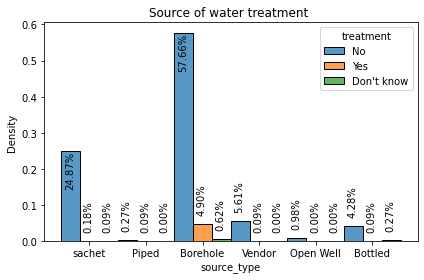

In [10]:
# Density plot of Source type divided by treatment recieved or not
ax = sns.histplot(x="source_type", hue = "treatment", multiple = "dodge" , 
                  data = water_quality, stat = "density")
plt.title("Source of water treatment ")
# Annotate the values on graph in percentage
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.1
        if p.get_height() < 0.2:
            y = p.get_y() + p.get_height()+0.03
        else:
            y = p.get_y() + p.get_height()- 0.1
        
        ax.annotate(percentage, (x, y), rotation = 90)
plt.tight_layout()

plt.savefig("treatment_source.png")

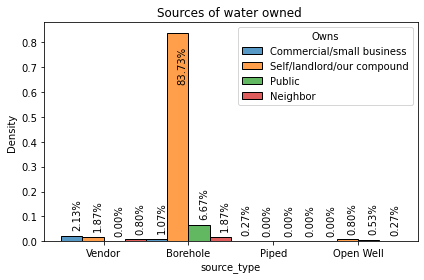

In [11]:
# Density plot of sorce type based on owner type
ax = sns.histplot(x="source_type", hue = "Owns", multiple = "dodge" , 
                  data = water_quality.query('Owns != 0'), stat = "density")
plt.title("Sources of water owned ")

# Annotate the values on graph in percentage
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width()/2 
        if p.get_height() < 0.2:
            y = p.get_y() + p.get_height()+0.03
        else:
            y = p.get_y() + p.get_height()- 0.2
        
        ax.annotate(percentage, (x, y), rotation = 90)
plt.tight_layout()

plt.savefig("source_owns.png")

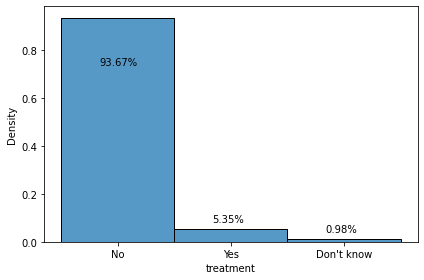

In [12]:
# density plot of water revied treatment or not
ax = sns.histplot(x = "treatment" , data = water_quality, stat = "density")
total = len(water_quality["treatment"])
# Annotate the values on graph in percentage
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width()/3 
        if p.get_height() < 0.2:
            y = p.get_y() + p.get_height() + 0.03
        else:
            y = p.get_y() + p.get_height() - 0.2
        
        ax.annotate(percentage, (x, y))
plt.tight_layout()
plt.savefig("Treatment.png")

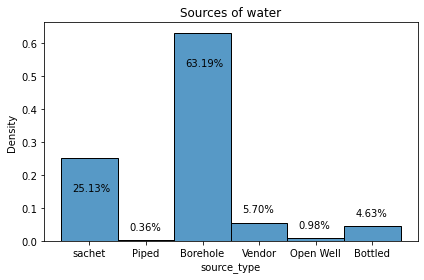

In [13]:
# Density plot of Source type of water smaples
ax = sns.histplot(x = "source_type" , data = water_quality, stat = "density")
total = len(water_quality["source_type"])

# Annotate the values on graph in percentage
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width()/2 -0.3
        if p.get_height() < 0.2:
            y = p.get_y() + p.get_height()+0.03
        else:
            y = p.get_y() + p.get_height()- 0.1
        ax.annotate(percentage, (x, y))
        
plt.title("Sources of water")
plt.tight_layout()

plt.savefig("Source_hist.png")

done SampleID


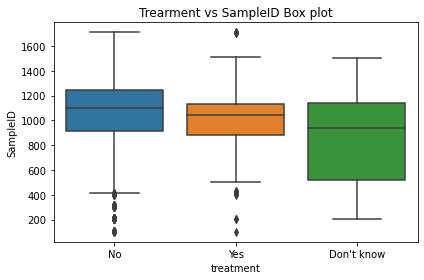

done SampleIDShort


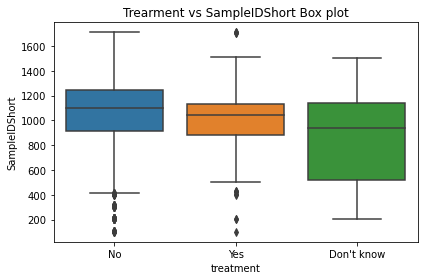

done TotalColiform


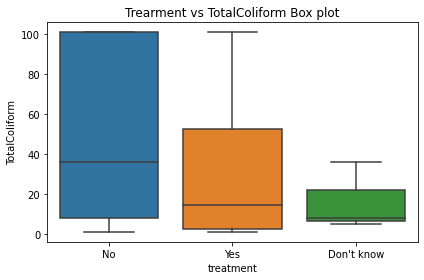

done FecalColiform


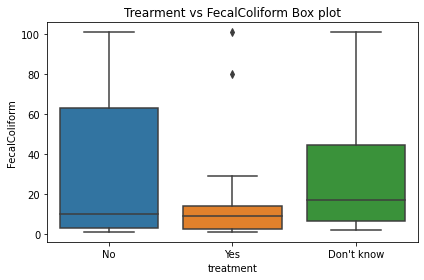

done pH


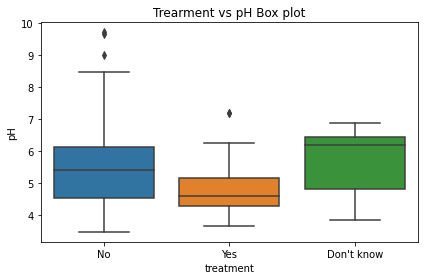

done Turbidity


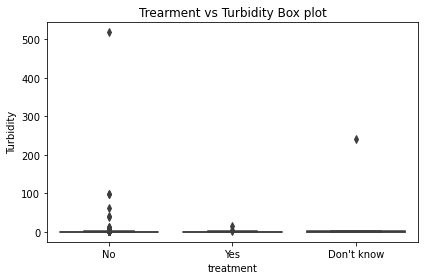

done Temperature


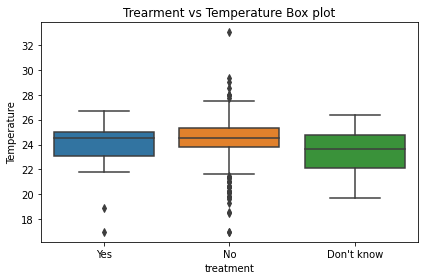

done RefinedOil
done Hydro.Zone


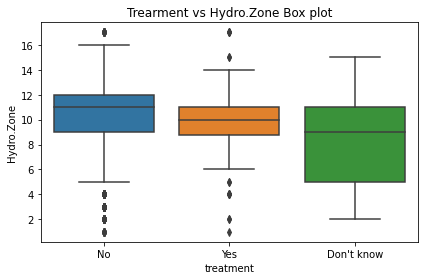

done Slum


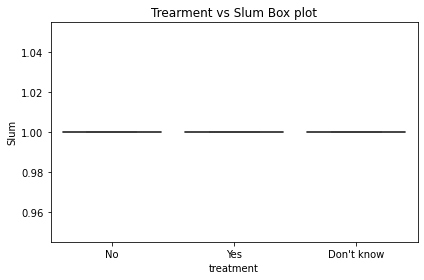

done Fluoride


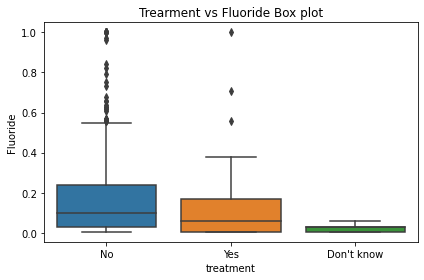

done Arsenic
done TDS


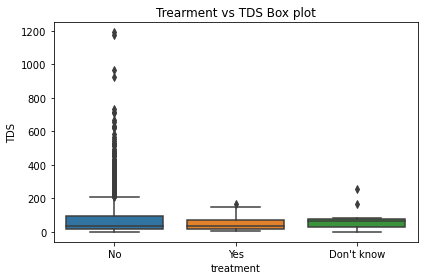

done gps_altitude


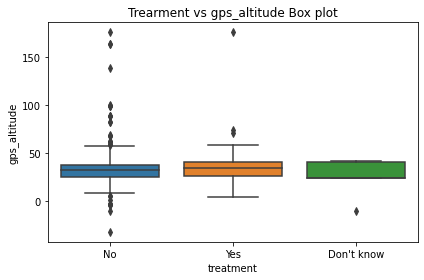

done gps_course


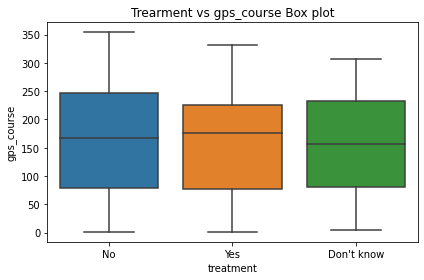

done gps_horizontal_accuracy


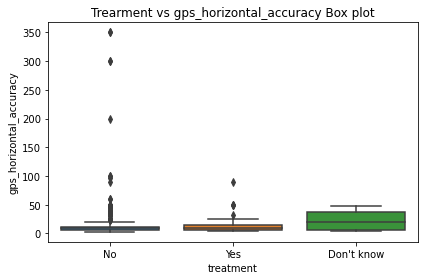

done latitude.sources


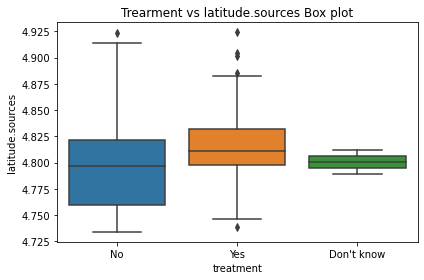

done latitude.users


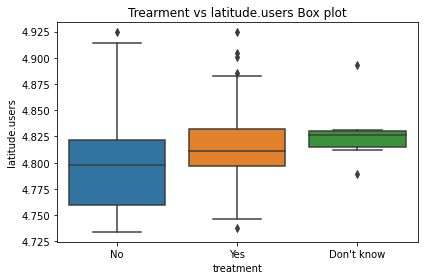

done longitude.sources


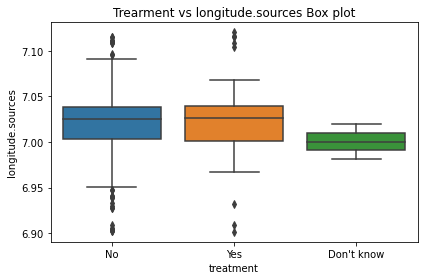

done longitude.users


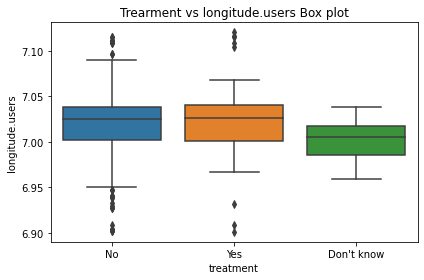

done latitude


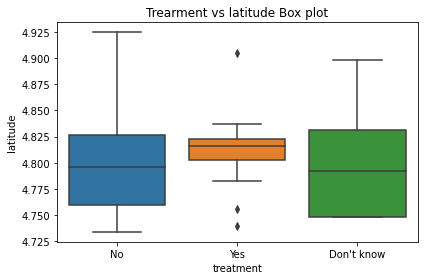

done longitude


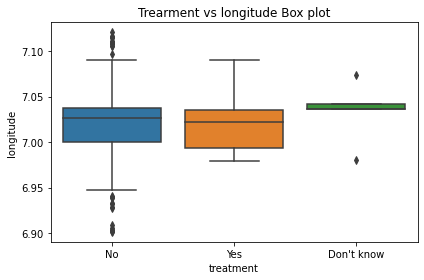

done boreholedepth1


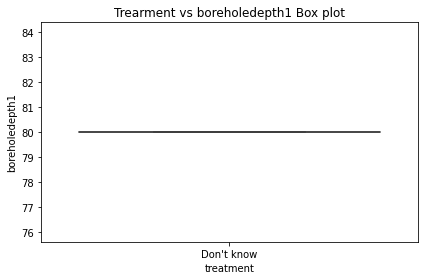

done SOsolidwaste


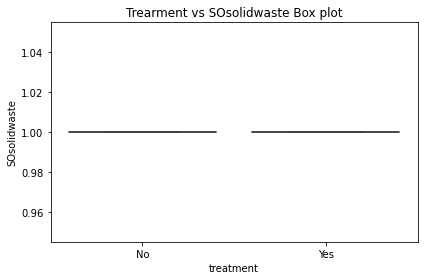

done SSpollution10


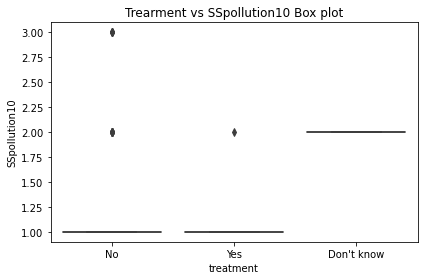

done CHEM.NO3DilutionWater


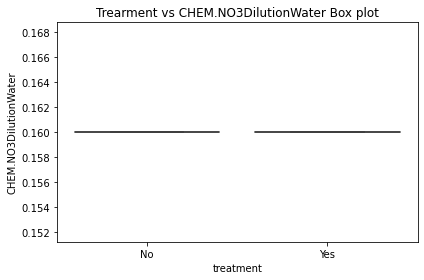

done CHEM.AlDilutionWater


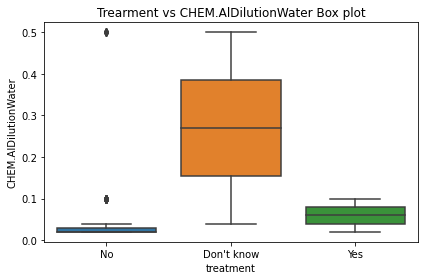

done Iron


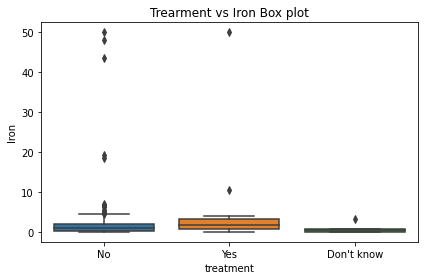

done Nickel


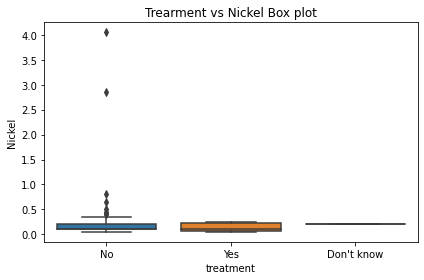

done Al


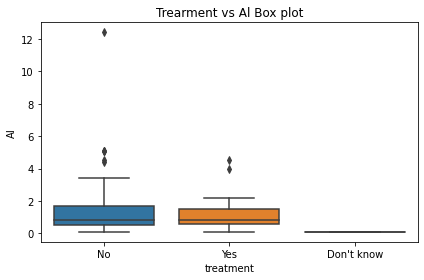

done Zinc


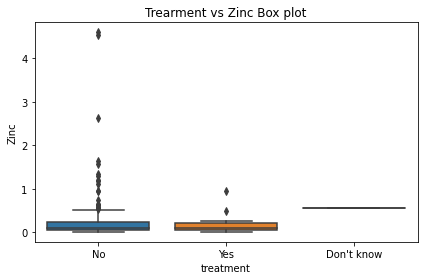

done Ecoli


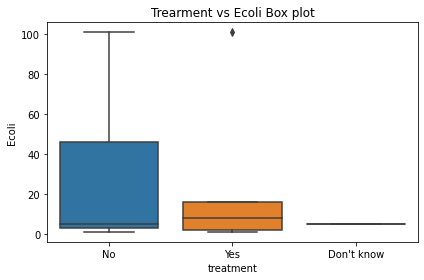

done lastrain


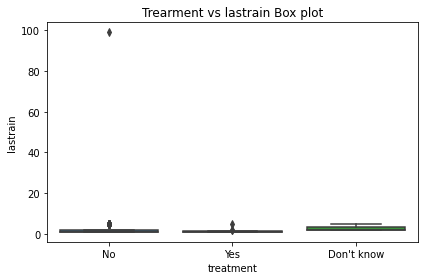

done thissampledrink


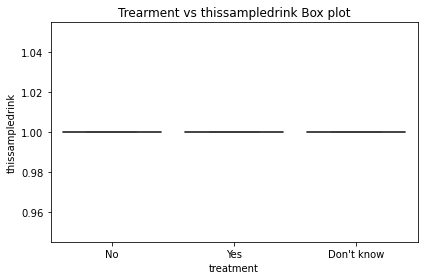

done thissamplecook


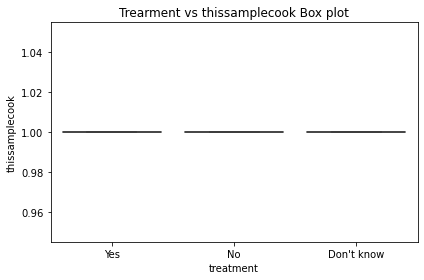

done thissamplewash


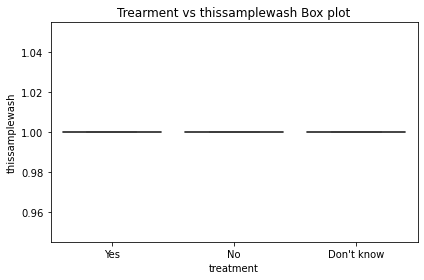

done LogFecal


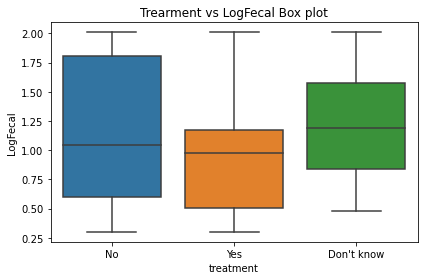

done LogTotal


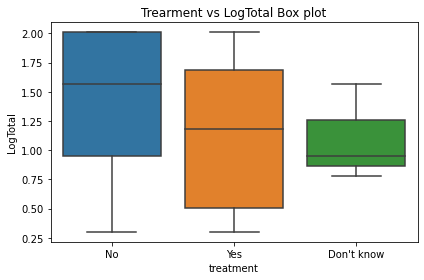

done NitrateVal


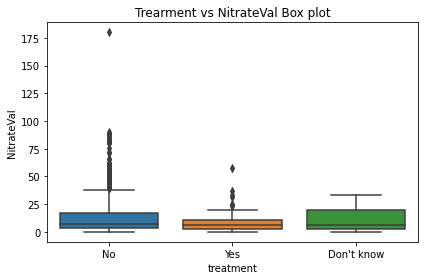

done LogNitrate


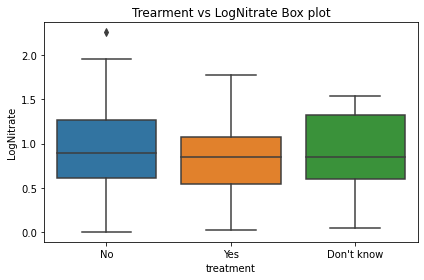

done LogEcoli


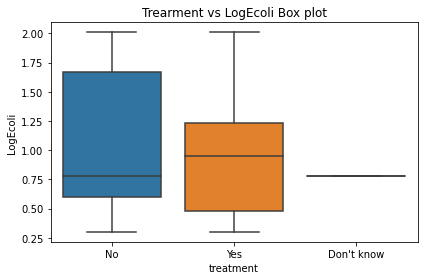

done FecalCat


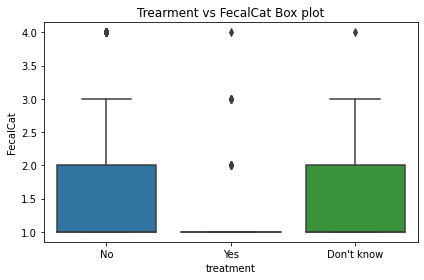

done TotalColCat


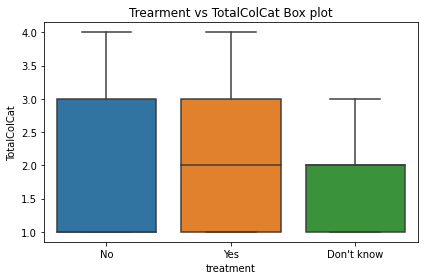

done EcoliCat


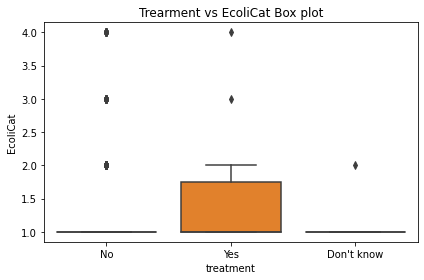

done LogTurbidity


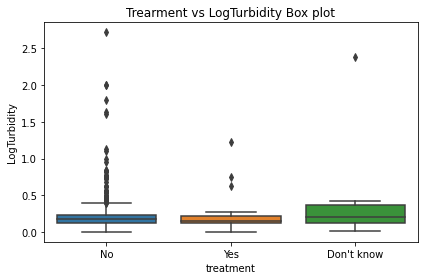

done AlAdjust


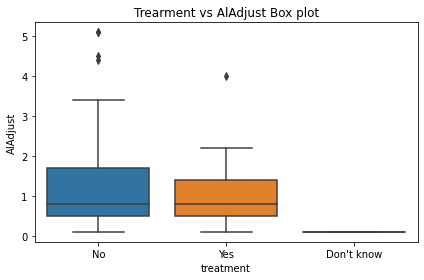

done Rainfallmm


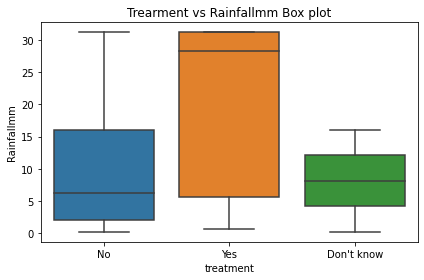

done disttowater


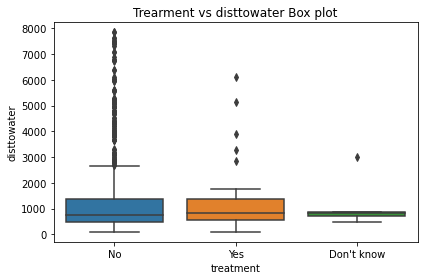

done SOanimalsAny


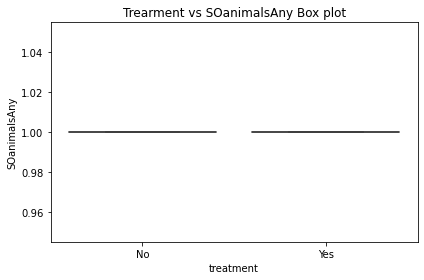

done SOchickens


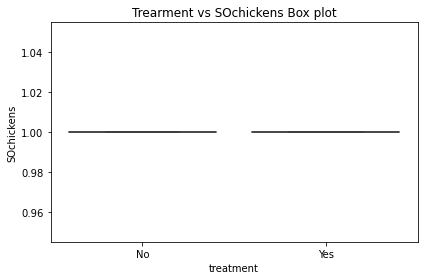

done SOlivestock


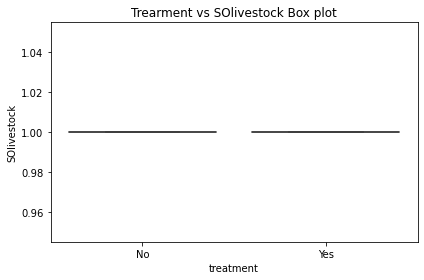

done SSScore


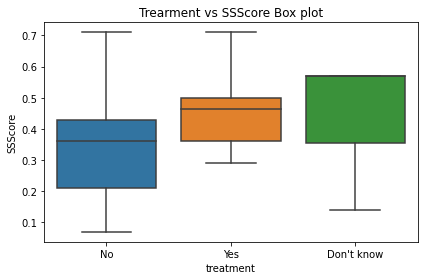

done SSScorePossible


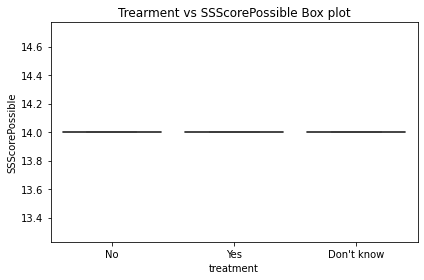

done Periphery


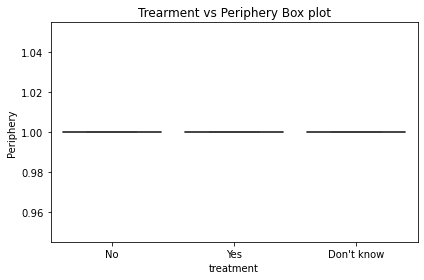

done lat


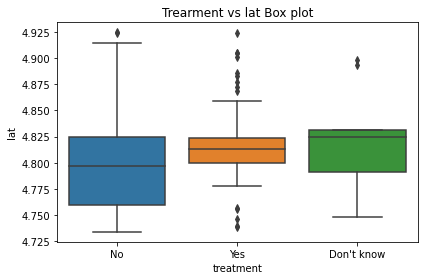

done long


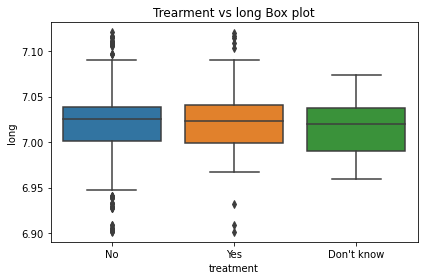

In [30]:
# Box plot of all numerical columns based vs Treatment
for column_name in column_list:
    plt.clf()
    
    # Remove non anailabe data
    water_quality_column = water_quality[water_quality[column_name] != 0]
    
    if len(water_quality_column[column_name]) < 1:
        continue
        
    sns.boxplot(x = "treatment", y = column_name , data = water_quality_column)
    plt.title(f"Trearment vs {column_name} Box plot")
    plt.tight_layout()
    plt.savefig(f"treatment_{i}.png")
    plt.show()
        

done SampleID


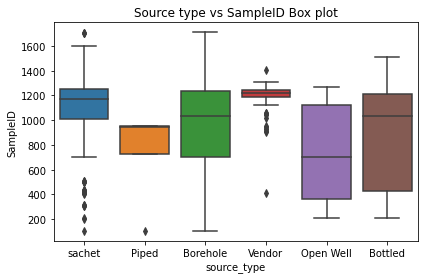

done SampleIDShort


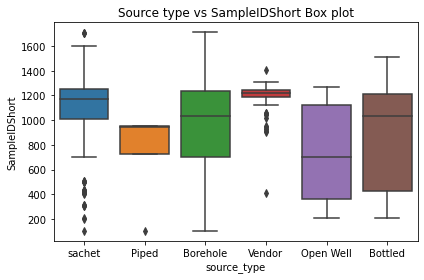

done TotalColiform


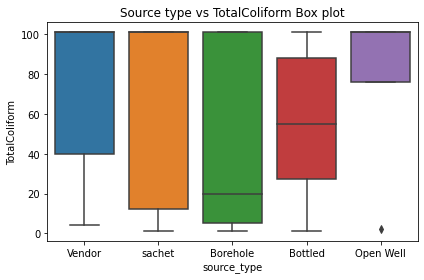

done FecalColiform


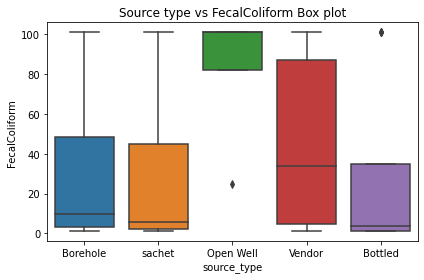

done pH


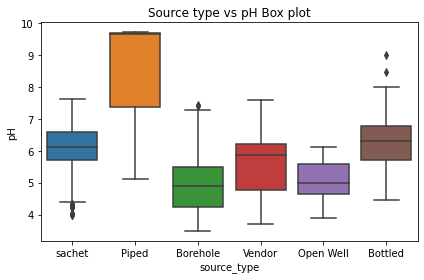

done Turbidity


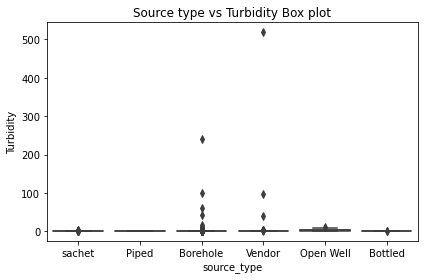

done Temperature


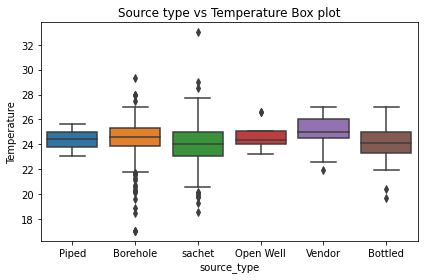

done RefinedOil
done Hydro.Zone


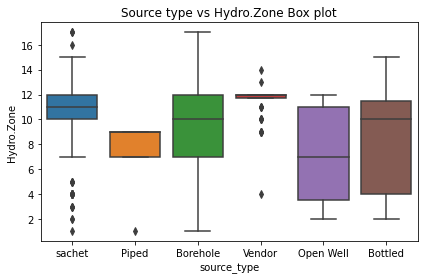

done Slum


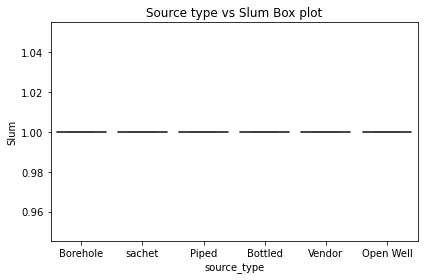

done Fluoride


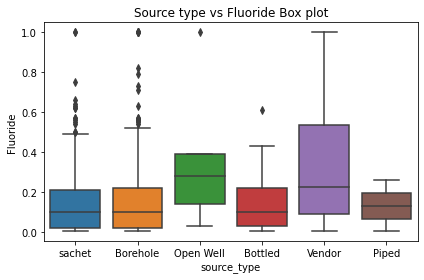

done Arsenic
done TDS


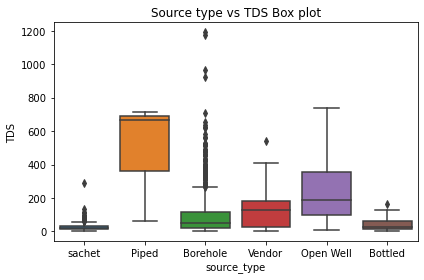

done gps_altitude


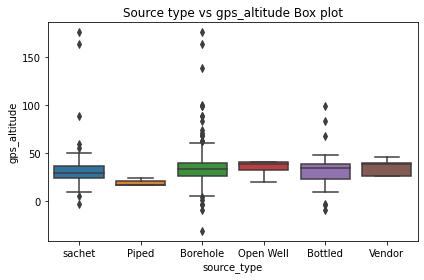

done gps_course


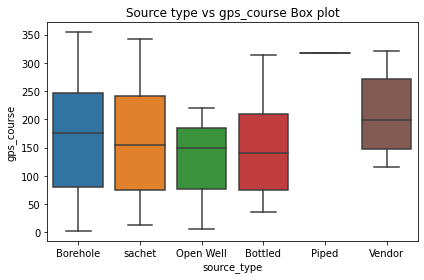

done gps_horizontal_accuracy


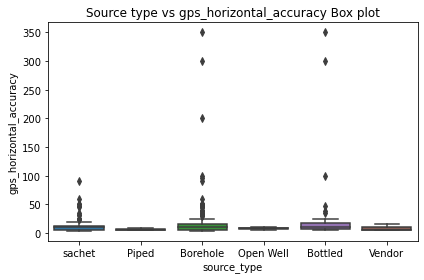

done latitude.sources


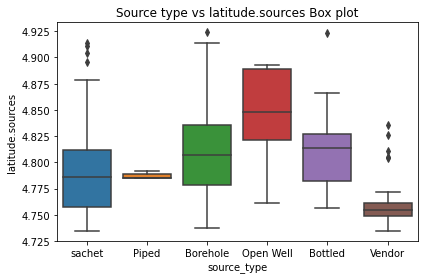

done latitude.users


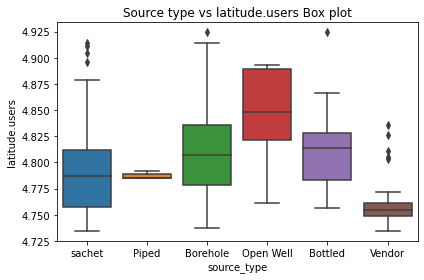

done longitude.sources


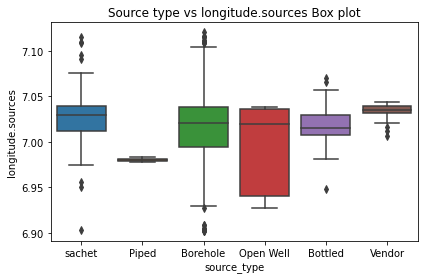

done longitude.users


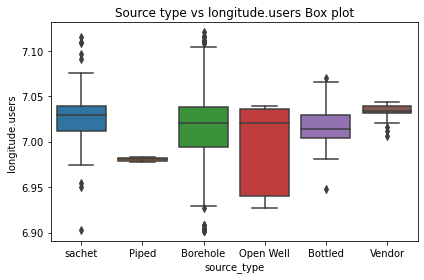

done latitude


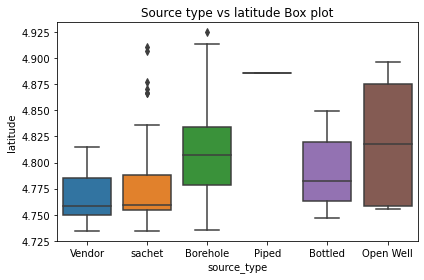

done longitude


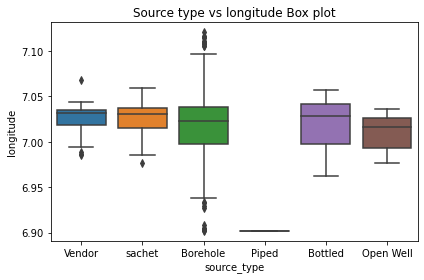

done boreholedepth1


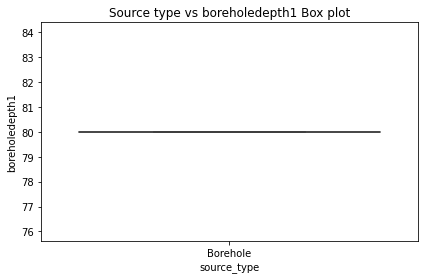

done SOsolidwaste


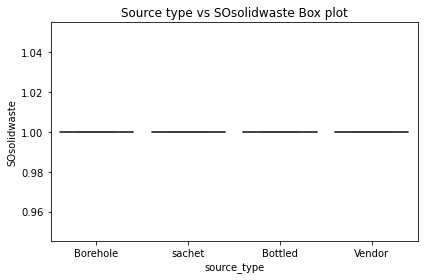

done SSpollution10


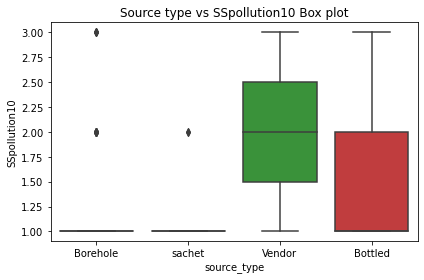

done CHEM.NO3DilutionWater


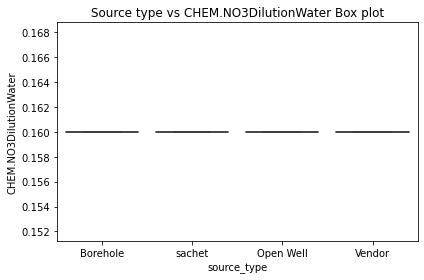

done CHEM.AlDilutionWater


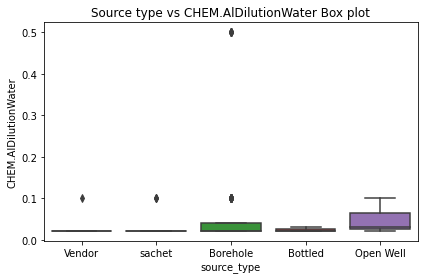

done Iron


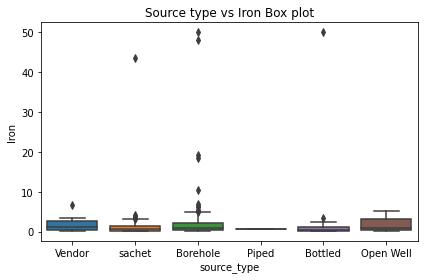

done Nickel


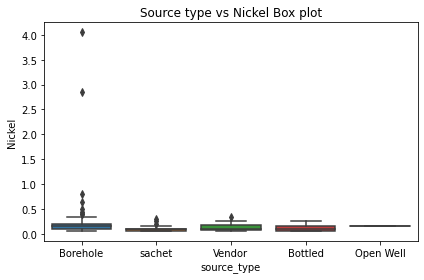

done Al


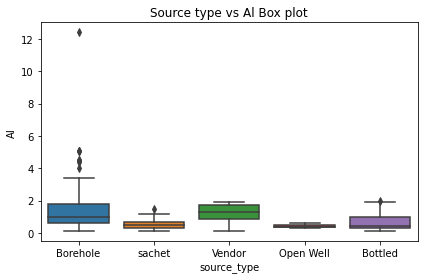

done Zinc


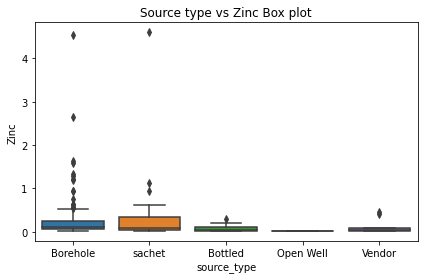

done Ecoli


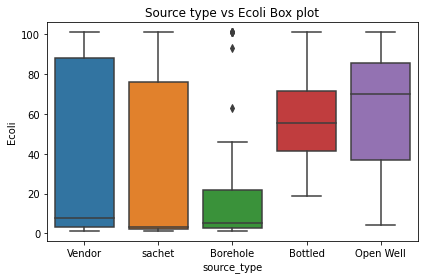

done lastrain


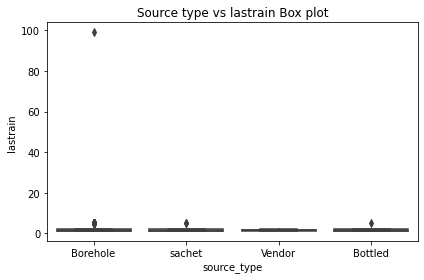

done thissampledrink


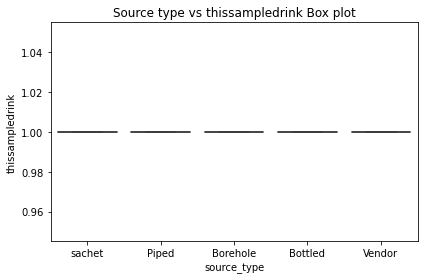

done thissamplecook


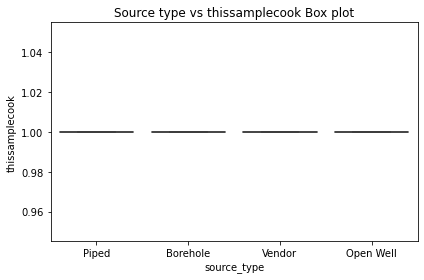

done thissamplewash


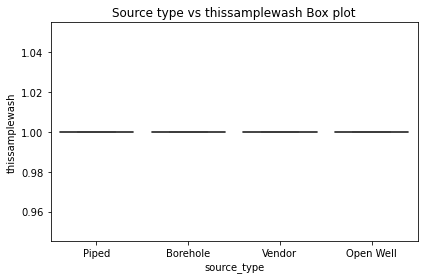

done LogFecal


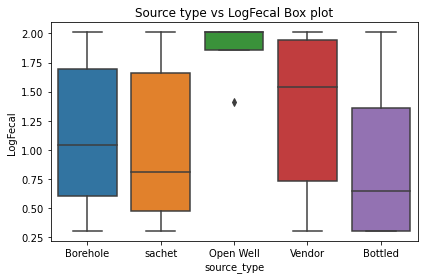

done LogTotal


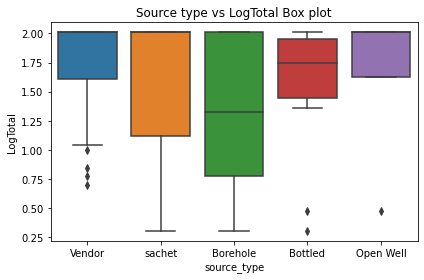

done NitrateVal


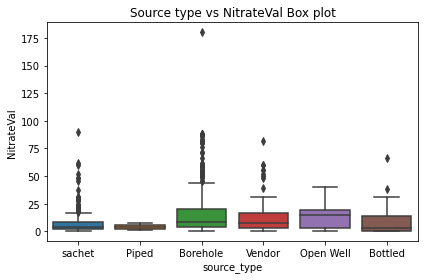

done LogNitrate


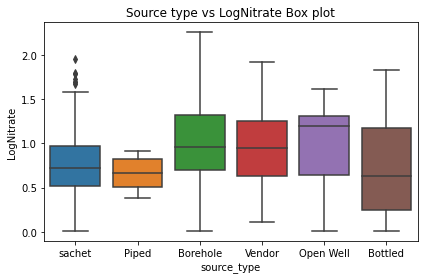

done LogEcoli


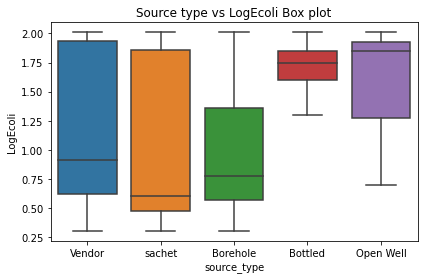

done FecalCat


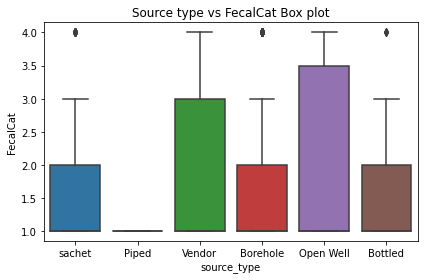

done TotalColCat


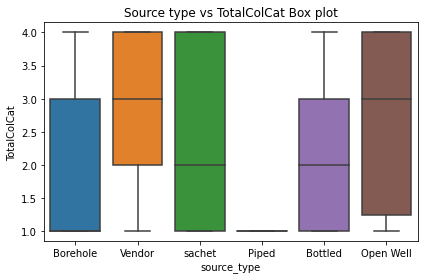

done EcoliCat


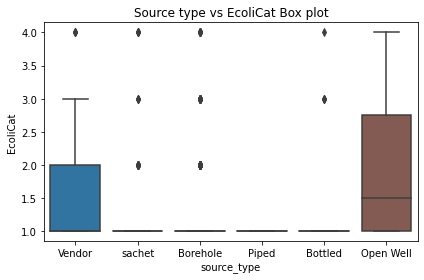

done LogTurbidity


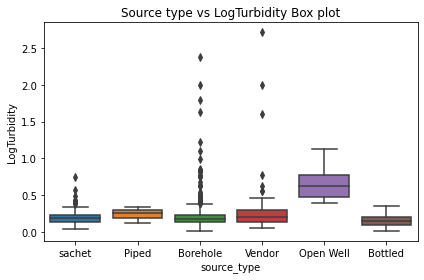

done AlAdjust


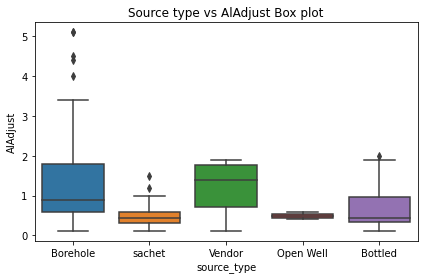

done Rainfallmm


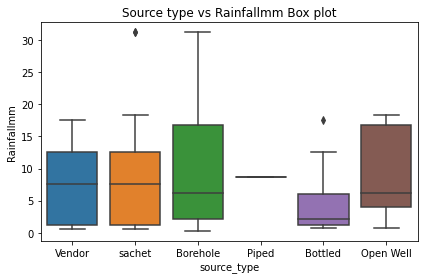

done disttowater


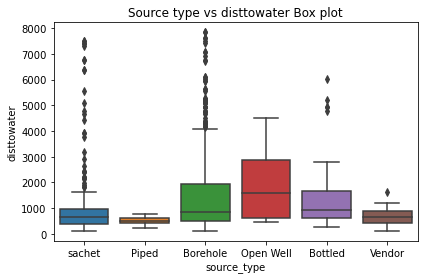

done SOanimalsAny


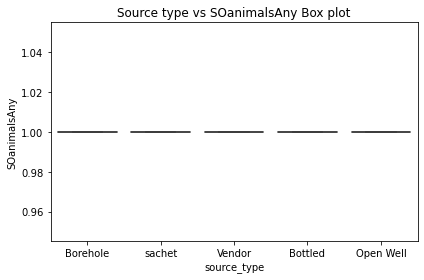

done SOchickens


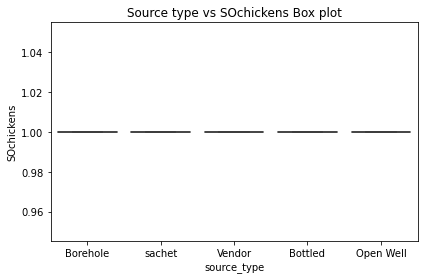

done SOlivestock


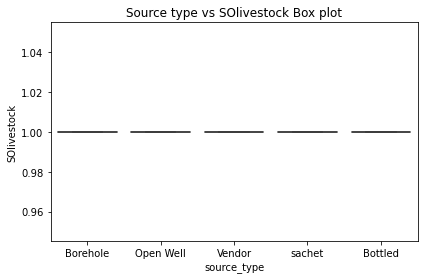

done SSScore


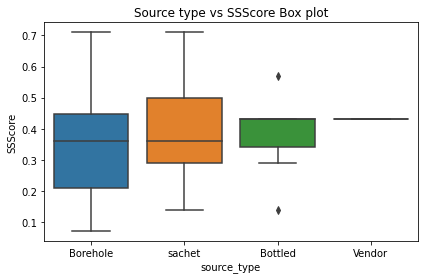

done SSScorePossible


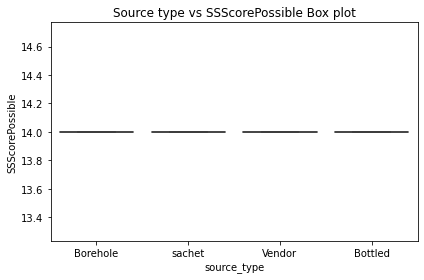

done Periphery


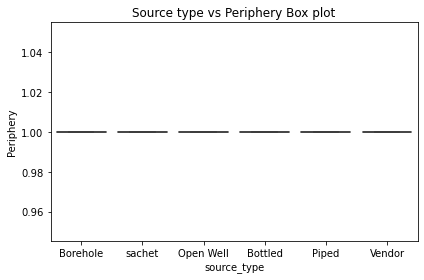

done lat


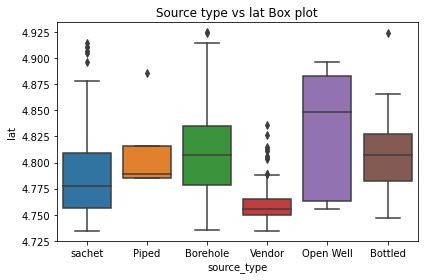

done long


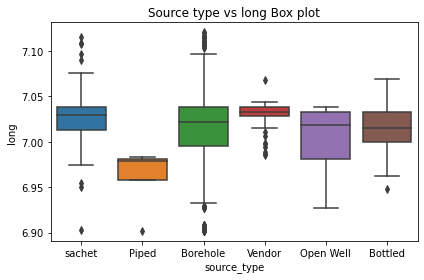

In [33]:
# Box plot of numerical column vs source_type
for column_name in column_list:
    plt.clf()
    
    # Removing Non available data
    water_quality_column = water_quality[water_quality[column_name] != 0]
    
    if len(water_quality_column[column_name]) < 1:
        continue
        
    sns.boxplot(x = "source_type", y = column_name , data = water_quality_column)
    plt.title(f"Source type vs {column_name} Box plot")
    plt.tight_layout()
    plt.savefig(f"Source_{i}.png")
    plt.show()
        